In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd

In [41]:
import datetime as dt

In [42]:
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [44]:
# Database setup
engine = create_engine("sqlite:///hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
results = session.query(Measurement.date, Measurement.prcp).all()
for result in results:
    print(result)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2013-02-15', 0.0)
('2013-02-16', 0.0)
('2013-02-17', 0.0)
('2013-02-18', 0.0)
('2013-02-19', 0.09)
('2013-02-20', 0.09)
('2013-02-21', 0.07)
('2013-02-22', 0.31)
('2013-02-23', 0.15)
('2013-02-24', 0.04)
('2013-02-25', 0.0)
('2013-02-26', 0.01)
('2013-02-27', 0.03)
('2013-02-28', 0.0)
('2013-03-01', 0.0)
('2013-03-02', 0.0)
('2013-03-03', 0.0)
('2013-03-04', 0.0)
('2013-03-05', 0.0)
('2013-03-06', 0.0)
('2013-03-07', 0.0)
('2013-03-08', 0.0)
('2013-03-09', 0.02)
('2013-03-10', 1.29)
('2013-03-11', 0.8)
('2013-03-12', 0.01)
('2013-03-13', 0.0)
('2013-03-14', 0.0)
('2013-03-15', 0.0)
('2013-03-16', 0.0)
('2013-03-17', 0.0)
('2013-03-18', 0.0)
('2013-03-19', 0.0)
('2013-03-20', 0.0)
('2013-03-21', 0.0)
('2013-03-22', 0.0)
('2013-03-23', 0.02)
('2013-03-24', 0.0)
('2013-03-25', 0.32)
('2013-03-26', 0.0)
('2013-03-27', 0.0)
('2013-03-28', 0.3)
('2013-03-29', 0.06)
('2013-03-30', 0.01)
('2013-03-31', 0.25)
('2013-04-01', 0.0)
('2013-04-02', 0.0)
('2013-04-03', 0.0)
('2013-04-04', 0.0)
('20

('2015-09-03', 0.23)
('2015-09-04', 0.52)
('2015-09-05', 0.08)
('2015-09-06', 0.0)
('2015-09-07', 0.06)
('2015-09-08', 0.01)
('2015-09-09', 0.0)
('2015-09-10', 0.0)
('2015-09-11', 0.77)
('2015-09-12', 0.5)
('2015-09-13', 0.11)
('2015-09-14', 0.77)
('2015-09-15', 0.26)
('2015-09-16', 0.01)
('2015-09-17', 0.0)
('2015-09-18', 0.02)
('2015-09-19', 0.02)
('2015-09-20', 0.0)
('2015-09-21', 0.07)
('2015-09-22', 0.09)
('2015-09-23', 0.01)
('2015-09-24', 0.0)
('2015-09-25', 0.08)
('2015-09-26', 0.03)
('2015-09-27', 0.15)
('2015-09-28', 0.04)
('2015-09-29', 0.11)
('2015-09-30', 0.04)
('2015-10-01', 0.05)
('2015-10-02', 0.03)
('2015-10-03', 0.0)
('2015-10-04', 0.0)
('2015-10-05', 0.0)
('2015-10-06', 0.0)
('2015-10-07', 0.04)
('2015-10-08', 0.0)
('2015-10-09', 0.0)
('2015-10-10', 0.0)
('2015-10-11', 0.0)
('2015-10-12', 0.03)
('2015-10-13', 0.04)
('2015-10-14', 0.01)
('2015-10-15', 0.01)
('2015-10-16', 0.0)
('2015-10-17', 0.0)
('2015-10-18', 0.04)
('2015-10-19', 0.0)
('2015-10-20', 0.01)
('2015-10-

('2017-06-03', 0.02)
('2017-06-04', 0.0)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.0)
('2017-06-10', 0.04)
('2017-06-11', 0.08)
('2017-06-12', 0.02)
('2017-06-13', 0.0)
('2017-06-14', 0.0)
('2017-06-15', 0.0)
('2017-06-16', 0.0)
('2017-06-17', 0.0)
('2017-06-18', 0.05)
('2017-06-19', 0.0)
('2017-06-20', 0.02)
('2017-06-21', 0.0)
('2017-06-22', 0.0)
('2017-06-23', 0.0)
('2017-06-24', 0.06)
('2017-06-25', 0.0)
('2017-06-26', 0.0)
('2017-06-27', 0.0)
('2017-06-28', 0.0)
('2017-06-29', 0.0)
('2017-06-30', 0.08)
('2017-07-01', 0.02)
('2017-07-02', 0.02)
('2017-07-03', 0.04)
('2017-07-04', 0.04)
('2017-07-05', 0.0)
('2017-07-06', 0.0)
('2017-07-07', 0.0)
('2017-07-08', 0.0)
('2017-07-09', 0.0)
('2017-07-10', 0.0)
('2017-07-11', 0.0)
('2017-07-12', 0.0)
('2017-07-13', 0.07)
('2017-07-14', 0.02)
('2017-07-15', 0.0)
('2017-07-16', 0.02)
('2017-07-17', 0.03)
('2017-07-18', 0.05)
('2017-07-20', 0.03)
('2017-07-21', 0.0)
('2017-07-22', 0.03)
(

('2011-03-04', 1.05)
('2011-03-05', 0.13)
('2011-03-06', 1.16)
('2011-03-07', 0.01)
('2011-03-08', 0.03)
('2011-03-09', 0.09)
('2011-03-10', 1.33)
('2011-03-11', 0.07)
('2011-03-12', 0.14)
('2011-03-13', 0.0)
('2011-03-14', 0.0)
('2011-03-15', 0.0)
('2011-03-16', 0.01)
('2011-03-17', 0.01)
('2011-03-18', 0.03)
('2011-03-19', 0.04)
('2011-03-20', 0.14)
('2011-03-21', 0.0)
('2011-03-22', 0.18)
('2011-03-23', 0.04)
('2011-03-24', 0.12)
('2011-03-25', 0.07)
('2011-03-26', 0.02)
('2011-03-27', 0.04)
('2011-03-28', 0.08)
('2011-03-29', 0.05)
('2011-03-30', 0.08)
('2011-03-31', 0.0)
('2011-04-01', 0.03)
('2011-04-02', 0.01)
('2011-04-03', 0.01)
('2011-04-04', 0.0)
('2011-04-05', 0.0)
('2011-04-06', 0.09)
('2011-04-07', 0.68)
('2011-04-08', 0.39)
('2011-04-09', 0.02)
('2011-04-10', 0.0)
('2011-04-11', 0.0)
('2011-04-12', 0.0)
('2011-04-13', 0.02)
('2011-04-14', 0.02)
('2011-04-15', 0.04)
('2011-04-16', 0.05)
('2011-04-17', 0.0)
('2011-04-18', 0.0)
('2011-04-19', 0.0)
('2011-04-20', 0.0)
('2011

('2014-03-03', 0.26)
('2014-03-04', 0.0)
('2014-03-05', 0.0)
('2014-03-06', 0.0)
('2014-03-07', 0.12)
('2014-03-08', 0.94)
('2014-03-09', 0.34)
('2014-03-10', 0.05)
('2014-03-11', 0.05)
('2014-03-12', 0.0)
('2014-03-13', 0.0)
('2014-03-14', 0.08)
('2014-03-15', 0.1)
('2014-03-16', 0.01)
('2014-03-17', 0.04)
('2014-03-18', 0.0)
('2014-03-19', 0.01)
('2014-03-20', 0.0)
('2014-03-21', 0.02)
('2014-03-22', 0.0)
('2014-03-23', 0.0)
('2014-03-24', 0.0)
('2014-03-25', 0.02)
('2014-03-26', 0.45)
('2014-03-27', 0.4)
('2014-03-28', 1.7)
('2014-03-29', 1.6)
('2014-03-30', 0.93)
('2014-03-31', 0.03)
('2014-04-01', 0.03)
('2014-04-02', 0.2)
('2014-04-03', 0.05)
('2014-04-04', 0.01)
('2014-04-05', 0.03)
('2014-04-06', 0.1)
('2014-04-07', 0.23)
('2014-04-08', 0.02)
('2014-04-09', 0.0)
('2014-04-10', 0.0)
('2014-04-11', 0.01)
('2014-04-12', 0.39)
('2014-04-13', 0.01)
('2014-04-14', 0.01)
('2014-04-15', 0.01)
('2014-04-16', 0.06)
('2014-04-18', 0.05)
('2014-04-19', 0.14)
('2014-04-20', 0.03)
('2014-04-

('2016-03-03', 0.0)
('2016-03-04', 0.0)
('2016-03-05', 0.0)
('2016-03-06', 0.0)
('2016-03-07', 0.0)
('2016-03-08', 0.02)
('2016-03-09', 0.15)
('2016-03-10', 0.0)
('2016-03-11', 0.06)
('2016-03-12', 0.0)
('2016-03-13', 0.0)
('2016-03-14', 0.0)
('2016-03-15', 0.3)
('2016-03-16', 0.41)
('2016-03-17', 0.02)
('2016-03-18', 0.03)
('2016-03-19', 0.02)
('2016-03-20', 0.0)
('2016-03-21', 0.06)
('2016-03-22', 0.0)
('2016-03-23', 1.78)
('2016-03-24', 0.02)
('2016-03-25', 1.9)
('2016-03-26', 0.87)
('2016-03-27', 0.01)
('2016-03-28', 0.0)
('2016-03-29', 0.01)
('2016-03-30', 0.02)
('2016-03-31', 0.0)
('2016-04-01', 0.0)
('2016-04-02', 0.02)
('2016-04-03', 0.0)
('2016-04-04', 0.0)
('2016-04-05', 0.2)
('2016-04-06', 0.1)
('2016-04-07', 0.12)
('2016-04-08', 0.02)
('2016-04-09', 0.66)
('2016-04-10', 0.02)
('2016-04-11', 0.08)
('2016-04-12', 0.02)
('2016-04-13', 0.05)
('2016-04-14', 0.06)
('2016-04-15', 0.0)
('2016-04-16', 0.04)
('2016-04-17', 0.17)
('2016-04-18', 0.4)
('2016-04-19', 0.02)
('2016-04-20',

('2011-06-18', 0.0)
('2011-06-19', 0.12)
('2011-06-21', None)
('2011-06-22', 0.2)
('2011-06-23', 0.09)
('2011-06-24', 0.17)
('2011-06-25', 0.03)
('2011-06-27', None)
('2011-06-28', 0.12)
('2011-07-01', 0.01)
('2011-07-03', None)
('2011-07-04', 0.02)
('2011-07-05', 0.14)
('2011-07-06', 0.0)
('2011-07-07', 0.06)
('2011-07-08', 0.15)
('2011-07-09', 0.07)
('2011-07-10', 0.02)
('2011-07-12', None)
('2011-07-13', 0.03)
('2011-07-14', 0.01)
('2011-07-15', 0.13)
('2011-07-16', 0.02)
('2011-07-18', None)
('2011-07-19', 0.01)
('2011-07-20', 0.1)
('2011-07-21', 0.0)
('2011-07-22', 0.07)
('2011-07-25', None)
('2011-07-26', 0.01)
('2011-07-27', 0.13)
('2011-07-28', 0.0)
('2011-07-29', 0.04)
('2011-07-30', 0.39)
('2011-08-01', 0.0)
('2011-08-02', 0.03)
('2011-08-03', 0.02)
('2011-08-04', 0.01)
('2011-08-05', 0.02)
('2011-08-07', 0.0)
('2011-08-13', None)
('2011-08-15', None)
('2011-08-16', 0.01)
('2011-08-17', 0.0)
('2011-08-18', 0.0)
('2011-08-25', None)
('2011-08-26', 0.06)
('2011-08-27', 0.12)
('

('2014-08-28', 0.09)
('2014-08-29', 0.04)
('2014-08-30', 0.05)
('2014-09-01', None)
('2014-09-02', 0.47)
('2014-09-03', 0.0)
('2014-09-04', 0.01)
('2014-09-05', 0.09)
('2014-09-07', None)
('2014-09-08', 0.0)
('2014-09-09', 0.0)
('2014-09-10', 0.01)
('2014-09-11', 0.0)
('2014-09-12', 0.3)
('2014-09-15', None)
('2014-09-16', 0.0)
('2014-09-17', 0.09)
('2014-10-02', None)
('2014-10-03', 0.02)
('2014-10-04', 0.0)
('2014-10-06', None)
('2014-10-07', 0.07)
('2014-10-08', 0.0)
('2014-10-09', 0.0)
('2014-10-10', 0.01)
('2014-10-11', 0.13)
('2014-10-12', 0.0)
('2014-10-13', 0.11)
('2014-10-14', 0.02)
('2014-10-15', 0.01)
('2014-10-16', 0.0)
('2014-10-17', 0.08)
('2014-10-18', 0.12)
('2014-10-19', 3.48)
('2014-10-20', 1.0)
('2014-10-23', 0.16)
('2014-10-24', 0.12)
('2014-10-26', None)
('2014-10-27', 0.0)
('2014-10-28', 0.07)
('2014-10-29', 0.18)
('2014-10-30', 0.06)
('2014-10-31', 0.0)
('2014-11-01', 0.4)
('2014-11-02', 0.13)
('2014-11-03', 0.1)
('2014-11-04', 0.0)
('2014-11-05', 0.43)
('2014-11

('2017-01-14', 0.0)
('2017-01-16', None)
('2017-01-17', 0.0)
('2017-01-18', 0.0)
('2017-01-19', 0.0)
('2017-01-20', 0.0)
('2017-01-21', 0.02)
('2017-01-23', None)
('2017-01-25', None)
('2017-01-26', 0.01)
('2017-01-27', 0.0)
('2017-01-28', 0.0)
('2017-01-30', None)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-05', None)
('2017-02-06', 0.04)
('2017-02-07', 0.9)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 2.39)
('2017-02-12', 1.91)
('2017-02-13', 0.0)
('2017-02-14', 0.0)
('2017-02-15', 0.0)
('2017-02-16', 0.62)
('2017-02-17', 0.06)
('2017-02-20', None)
('2017-02-21', 0.0)
('2017-02-22', 0.11)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-26', None)
('2017-02-27', 0.0)
('2017-02-28', 0.04)
('2017-03-01', 1.12)
('2017-03-03', None)
('2017-03-06', None)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.5)
('2017-03-10', 0.13)
('2017-03-12', None)
('2017-03-13', 0.0)
('2017-03-14', 0.0)
('2017-03-16', None

('2013-08-27', 0.0)
('2013-08-28', 0.0)
('2013-08-29', 0.05)
('2013-09-03', None)
('2013-09-04', 0.0)
('2013-09-05', 0.0)
('2013-09-06', 0.0)
('2013-09-09', None)
('2013-09-10', 0.0)
('2013-09-11', 0.0)
('2013-09-12', 0.0)
('2013-09-13', 0.3)
('2013-09-16', None)
('2013-09-17', None)
('2013-09-18', None)
('2013-09-19', None)
('2013-09-20', 0.0)
('2013-09-26', 0.2)
('2013-09-27', 0.03)
('2013-09-30', None)
('2013-10-01', None)
('2013-10-02', None)
('2013-10-03', 0.0)
('2013-10-04', None)
('2013-10-07', None)
('2013-10-08', 0.0)
('2013-10-11', 0.0)
('2013-10-14', None)
('2013-10-15', None)
('2013-10-16', 0.05)
('2013-10-17', 0.0)
('2013-10-18', 0.0)
('2013-10-22', 0.0)
('2013-10-23', 0.0)
('2013-10-24', 0.0)
('2013-10-25', None)
('2013-10-28', None)
('2013-10-29', 0.0)
('2013-10-30', 0.0)
('2013-10-31', 0.0)
('2013-11-01', 0.0)
('2013-11-04', None)
('2013-11-05', 0.0)
('2013-11-06', 0.0)
('2013-11-07', 0.0)
('2013-11-08', None)
('2013-11-14', 0.0)
('2013-11-15', 0.2)
('2013-11-18', None)

('2016-02-20', None)
('2016-02-23', None)
('2016-02-24', None)
('2016-02-25', None)
('2016-02-26', None)
('2016-02-27', None)
('2016-03-01', None)
('2016-03-02', None)
('2016-03-03', None)
('2016-03-04', None)
('2016-03-07', None)
('2016-03-08', None)
('2016-03-09', None)
('2016-03-10', None)
('2016-03-11', None)
('2016-03-14', None)
('2016-03-15', None)
('2016-03-16', 0.0)
('2016-03-22', None)
('2016-03-23', None)
('2016-03-28', None)
('2016-03-29', None)
('2016-03-30', None)
('2016-03-31', None)
('2016-04-01', 0.0)
('2016-04-04', 0.0)
('2016-04-05', 0.04)
('2016-04-06', None)
('2016-04-07', None)
('2016-04-08', 0.0)
('2016-04-18', None)
('2016-04-19', None)
('2016-04-20', None)
('2016-04-21', None)
('2016-04-22', None)
('2016-04-25', None)
('2016-04-26', None)
('2016-04-27', None)
('2016-04-28', None)
('2016-04-29', None)
('2016-05-02', None)
('2016-05-03', 0.0)
('2016-05-04', None)
('2016-05-05', None)
('2016-05-06', None)
('2016-05-09', None)
('2016-05-10', None)
('2016-05-11', Non

('2010-08-17', 0.0)
('2010-08-18', 0.02)
('2010-08-19', 0.04)
('2010-08-20', 0.02)
('2010-08-21', 0.01)
('2010-08-22', 0.01)
('2010-08-23', 0.0)
('2010-08-24', 0.0)
('2010-08-25', 0.06)
('2010-08-26', 0.06)
('2010-08-27', 0.01)
('2010-08-28', 0.0)
('2010-08-29', 0.05)
('2010-08-30', 0.0)
('2010-08-31', 0.02)
('2010-09-01', 0.0)
('2010-09-02', 0.14)
('2010-09-03', 0.27)
('2010-09-04', 0.02)
('2010-09-05', 0.01)
('2010-09-06', 0.02)
('2010-09-07', 0.23)
('2010-09-08', 0.07)
('2010-09-09', 0.02)
('2010-09-10', 0.17)
('2010-09-11', 0.18)
('2010-09-12', 0.01)
('2010-09-13', 0.0)
('2010-09-14', 0.0)
('2010-09-15', 0.0)
('2010-09-16', 0.0)
('2010-09-17', 0.0)
('2010-09-18', 0.01)
('2010-09-19', 0.07)
('2010-09-20', 0.06)
('2010-09-21', 0.04)
('2010-09-22', 0.22)
('2010-09-23', 0.18)
('2010-09-24', 0.06)
('2010-09-25', 0.05)
('2010-09-26', 0.0)
('2010-09-27', 0.0)
('2010-09-28', 0.0)
('2010-09-29', 0.0)
('2010-09-30', 0.24)
('2010-10-01', 0.43)
('2010-10-02', 0.05)
('2010-10-03', 0.01)
('2010-

('2014-07-17', 0.0)
('2014-07-18', 0.0)
('2014-07-19', 0.0)
('2014-07-20', 5.54)
('2014-07-21', 0.07)
('2014-07-22', 0.41)
('2014-07-23', 0.0)
('2014-07-24', 0.0)
('2014-07-27', None)
('2014-07-28', 0.0)
('2014-07-31', None)
('2014-08-01', 0.0)
('2014-08-02', 0.0)
('2014-08-03', 0.0)
('2014-08-04', 0.0)
('2014-08-05', 0.0)
('2014-08-06', 0.36)
('2014-08-08', None)
('2014-08-09', 0.12)
('2014-08-11', None)
('2014-08-12', 0.0)
('2014-08-13', 0.27)
('2014-08-14', 0.0)
('2014-08-15', 0.0)
('2014-08-16', 0.15)
('2014-08-17', 0.05)
('2014-08-18', 0.01)
('2014-08-19', 0.0)
('2014-08-20', 0.0)
('2014-08-21', 0.17)
('2014-08-22', 0.02)
('2014-08-24', None)
('2014-08-25', 0.0)
('2014-08-26', 0.19)
('2014-08-27', 0.02)
('2014-08-28', 0.03)
('2014-08-29', 0.0)
('2014-08-30', 0.17)
('2014-08-31', 0.0)
('2014-09-01', 0.0)
('2014-09-02', 0.39)
('2014-09-03', 0.0)
('2014-09-04', 0.04)
('2014-09-05', 0.09)
('2014-09-06', 0.22)
('2014-09-07', 0.0)
('2014-09-08', 0.0)
('2014-09-09', 0.0)
('2014-09-10', 0

('2015-11-17', 0.0)
('2015-11-18', 0.23)
('2015-11-19', 0.07)
('2015-11-20', 1.75)
('2015-11-21', 2.3)
('2015-11-22', 1.84)
('2015-11-23', 1.1)
('2015-11-24', 1.12)
('2015-11-25', 0.13)
('2015-11-26', 0.58)
('2015-11-27', 0.49)
('2015-11-28', 0.02)
('2015-11-29', 0.14)
('2015-11-30', 0.01)
('2015-12-02', None)
('2015-12-03', 0.03)
('2015-12-04', 0.0)
('2015-12-05', 0.0)
('2015-12-07', None)
('2015-12-08', 0.04)
('2015-12-09', 0.13)
('2015-12-10', 0.14)
('2015-12-11', 0.06)
('2015-12-12', 0.41)
('2015-12-13', 0.01)
('2015-12-14', 0.03)
('2015-12-15', 0.28)
('2015-12-16', 0.0)
('2015-12-17', 0.06)
('2015-12-18', 0.12)
('2015-12-19', 0.24)
('2015-12-20', 0.04)
('2015-12-22', None)
('2015-12-23', 0.0)
('2015-12-24', 0.0)
('2015-12-25', 0.23)
('2015-12-26', 0.15)
('2015-12-27', 0.48)
('2015-12-28', 0.05)
('2015-12-29', 0.01)
('2015-12-31', None)
('2016-01-01', 0.0)
('2016-01-02', 0.13)
('2016-01-03', 0.0)
('2016-01-05', None)
('2016-01-06', 0.0)
('2016-01-07', 0.0)
('2016-01-08', 0.0)
('201

('2010-04-28', 0.04)
('2010-04-29', 0.07)
('2010-04-30', 0.17)
('2010-05-01', 0.39)
('2010-05-02', 0.11)
('2010-05-03', 1.06)
('2010-05-04', 0.11)
('2010-05-05', 0.0)
('2010-05-06', 0.01)
('2010-05-07', 0.16)
('2010-05-08', 0.01)
('2010-05-09', 0.0)
('2010-05-10', 0.0)
('2010-05-11', 0.06)
('2010-05-12', 0.02)
('2010-05-13', 0.06)
('2010-05-14', 0.0)
('2010-05-15', 0.14)
('2010-05-16', 0.13)
('2010-05-17', 0.01)
('2010-05-18', 0.0)
('2010-05-19', 0.0)
('2010-05-20', 0.28)
('2010-05-21', 0.02)
('2010-05-22', 0.18)
('2010-05-23', 0.28)
('2010-05-24', 0.22)
('2010-05-25', 0.33)
('2010-05-26', 0.09)
('2010-05-27', 0.0)
('2010-05-28', 0.0)
('2010-05-29', 0.8)
('2010-05-30', 0.01)
('2010-05-31', 0.04)
('2010-06-01', 0.0)
('2010-06-02', 0.03)
('2010-06-03', 0.0)
('2010-06-04', 0.0)
('2010-06-05', 0.0)
('2010-06-06', 0.0)
('2010-06-07', 0.12)
('2010-06-08', 0.0)
('2010-06-09', 0.0)
('2010-06-10', 0.0)
('2010-06-11', 0.0)
('2010-06-12', 0.0)
('2010-06-13', 0.04)
('2010-06-14', 0.06)
('2010-06-1

('2013-03-31', 0.04)
('2013-04-01', 0.0)
('2013-04-02', 0.02)
('2013-04-03', 0.0)
('2013-04-04', 0.11)
('2013-04-05', 0.0)
('2013-04-06', 0.17)
('2013-04-07', 0.03)
('2013-04-08', 0.0)
('2013-04-09', 0.0)
('2013-04-10', 0.04)
('2013-04-11', 0.02)
('2013-04-12', 0.2)
('2013-04-13', 0.09)
('2013-04-14', 0.01)
('2013-04-15', 0.79)
('2013-04-16', 0.12)
('2013-04-17', 0.0)
('2013-04-18', 0.02)
('2013-04-19', 0.13)
('2013-04-20', 0.59)
('2013-04-21', 0.01)
('2013-04-22', 0.41)
('2013-04-23', 0.08)
('2013-04-24', 1.39)
('2013-04-25', 0.98)
('2013-04-26', 0.01)
('2013-04-27', 0.0)
('2013-04-28', 0.0)
('2013-04-29', 0.0)
('2013-04-30', 0.0)
('2013-05-01', 0.0)
('2013-05-02', 0.0)
('2013-05-03', 0.02)
('2013-05-04', 0.0)
('2013-05-05', 1.95)
('2013-05-06', 0.36)
('2013-05-07', 0.02)
('2013-05-08', 0.0)
('2013-05-09', 0.0)
('2013-05-10', 0.0)
('2013-05-11', 1.57)
('2013-05-12', 1.33)
('2013-05-13', 3.88)
('2013-05-14', 0.08)
('2013-05-15', 0.01)
('2013-05-16', 0.18)
('2013-05-17', 0.01)
('2013-05

('2014-10-31', 0.03)
('2014-11-01', 0.12)
('2014-11-02', 0.48)
('2014-11-03', 0.12)
('2014-11-04', 0.07)
('2014-11-05', 0.03)
('2014-11-06', 0.12)
('2014-11-07', 0.01)
('2014-11-08', 0.67)
('2014-11-09', 0.01)
('2014-11-10', 0.0)
('2014-11-11', 0.0)
('2014-11-12', 0.77)
('2014-11-13', 0.0)
('2014-11-14', 0.0)
('2014-11-15', 0.95)
('2014-11-16', 0.15)
('2014-11-17', 0.0)
('2014-11-18', 0.0)
('2014-11-19', 0.0)
('2014-11-20', 0.02)
('2014-11-21', 0.0)
('2014-11-22', 0.01)
('2014-11-23', 0.0)
('2014-11-24', 0.0)
('2014-11-25', 0.21)
('2014-11-26', 0.0)
('2014-11-27', 0.0)
('2014-11-28', 0.0)
('2014-11-29', 0.05)
('2014-11-30', 0.62)
('2014-12-01', 0.0)
('2014-12-02', 0.0)
('2014-12-03', 0.41)
('2014-12-04', 1.56)
('2014-12-05', 0.04)
('2014-12-06', 0.63)
('2014-12-07', 0.01)
('2014-12-08', 0.0)
('2014-12-09', 0.0)
('2014-12-10', 0.0)
('2014-12-11', 0.21)
('2014-12-12', 0.07)
('2014-12-13', 0.01)
('2014-12-14', 0.13)
('2014-12-15', 0.0)
('2014-12-16', 0.08)
('2014-12-17', 0.07)
('2014-12-1

('2016-11-18', 0.0)
('2016-11-19', 0.11)
('2016-11-20', 0.39)
('2016-11-21', 0.11)
('2016-11-22', 2.05)
('2016-11-23', 0.25)
('2016-11-24', 0.3)
('2016-11-25', 0.08)
('2016-11-26', 0.06)
('2016-11-27', 0.17)
('2016-11-28', 0.0)
('2016-11-29', 0.09)
('2016-11-30', 0.05)
('2016-12-01', 0.37)
('2016-12-02', 0.35)
('2016-12-03', 0.77)
('2016-12-04', 0.04)
('2016-12-05', 0.22)
('2016-12-06', 0.0)
('2016-12-07', 0.12)
('2016-12-08', 0.07)
('2016-12-09', 0.31)
('2016-12-10', 0.02)
('2016-12-11', 0.0)
('2016-12-12', 0.0)
('2016-12-13', 0.04)
('2016-12-14', 0.92)
('2016-12-15', 0.14)
('2016-12-16', 0.03)
('2016-12-17', 0.07)
('2016-12-18', 0.16)
('2016-12-19', 0.03)
('2016-12-20', 0.0)
('2016-12-21', 0.11)
('2016-12-22', 0.86)
('2016-12-23', 0.24)
('2016-12-24', 0.2)
('2016-12-25', 0.02)
('2016-12-26', 0.22)
('2016-12-27', 0.05)
('2016-12-28', 0.09)
('2016-12-29', 0.52)
('2016-12-30', 0.29)
('2016-12-31', 0.25)
('2017-01-01', 0.03)
('2017-01-02', 0.01)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('

('2012-01-06', 0.0)
('2012-01-07', 0.0)
('2012-01-08', 0.0)
('2012-01-09', 0.0)
('2012-01-10', 0.0)
('2012-01-11', 0.0)
('2012-01-12', 0.0)
('2012-01-13', 0.0)
('2012-01-14', 0.0)
('2012-01-15', 0.0)
('2012-01-16', 0.02)
('2012-01-17', 0.0)
('2012-01-18', 0.0)
('2012-01-19', 0.0)
('2012-01-20', 0.0)
('2012-01-21', 0.0)
('2012-01-22', 0.0)
('2012-01-23', 0.01)
('2012-01-24', 0.0)
('2012-01-25', 0.0)
('2012-01-26', 0.0)
('2012-01-27', 0.33)
('2012-01-28', 0.0)
('2012-01-29', 0.01)
('2012-01-30', 0.01)
('2012-01-31', 0.0)
('2012-02-01', 0.0)
('2012-02-02', 0.0)
('2012-02-03', 0.0)
('2012-02-04', 0.0)
('2012-02-05', 0.0)
('2012-02-06', 0.15)
('2012-02-07', 0.3)
('2012-02-08', 0.39)
('2012-02-09', 0.0)
('2012-02-10', 0.0)
('2012-02-11', 0.0)
('2012-02-12', 0.0)
('2012-02-13', 0.0)
('2012-02-14', 0.0)
('2012-02-15', 0.0)
('2012-02-16', 0.0)
('2012-02-17', 0.0)
('2012-02-18', 0.0)
('2012-02-19', 0.01)
('2012-02-20', 0.0)
('2012-02-21', 0.0)
('2012-02-22', 0.0)
('2012-02-23', 0.05)
('2012-02-2

('2013-11-18', 0.0)
('2013-11-19', 0.0)
('2013-11-20', 0.0)
('2013-11-21', 0.0)
('2013-11-22', 0.0)
('2013-11-23', 0.0)
('2013-11-24', 0.0)
('2013-11-25', 0.0)
('2013-11-26', 0.0)
('2013-11-27', 0.0)
('2013-11-28', 0.0)
('2013-11-29', 0.0)
('2013-11-30', 0.42)
('2013-12-01', 0.46)
('2013-12-02', 0.87)
('2013-12-03', 0.0)
('2013-12-04', 0.01)
('2013-12-05', 0.01)
('2013-12-06', 0.0)
('2013-12-07', 0.0)
('2013-12-08', 0.0)
('2013-12-09', 0.0)
('2013-12-10', 0.0)
('2013-12-11', 0.0)
('2013-12-12', 0.02)
('2013-12-13', 0.0)
('2013-12-14', 0.0)
('2013-12-15', 0.06)
('2013-12-16', 2.4)
('2013-12-17', 0.01)
('2013-12-18', 0.01)
('2013-12-19', 0.05)
('2013-12-20', 0.0)
('2013-12-21', 0.0)
('2013-12-22', 0.0)
('2013-12-23', 0.08)
('2013-12-24', 0.0)
('2013-12-25', 0.0)
('2013-12-26', 0.0)
('2013-12-27', 0.0)
('2013-12-28', 0.0)
('2013-12-29', 0.0)
('2013-12-30', 0.0)
('2014-01-01', 0.0)
('2014-01-02', 0.3)
('2014-01-03', 1.05)
('2014-01-04', 0.0)
('2014-01-05', 0.0)
('2014-01-06', 0.0)
('2014-0

('2010-04-21', 0.17)
('2010-04-23', None)
('2010-04-24', 0.17)
('2010-04-25', 0.08)
('2010-04-26', 0.0)
('2010-04-27', 0.0)
('2010-04-28', 0.49)
('2010-04-29', 1.29)
('2010-04-30', 0.92)
('2010-05-01', 0.31)
('2010-05-02', 0.37)
('2010-05-03', 0.14)
('2010-05-04', 0.21)
('2010-05-05', 0.01)
('2010-05-06', 0.08)
('2010-05-07', 0.24)
('2010-05-08', 0.06)
('2010-05-09', 0.0)
('2010-05-10', 0.55)
('2010-05-12', None)
('2010-05-13', 0.32)
('2010-05-14', 0.0)
('2010-05-15', 0.25)
('2010-05-16', 0.61)
('2010-05-17', 0.1)
('2010-05-18', 0.0)
('2010-05-19', 0.0)
('2010-05-20', 0.67)
('2010-05-21', 0.38)
('2010-05-22', 0.01)
('2010-05-24', None)
('2010-05-25', 0.83)
('2010-05-26', 0.27)
('2010-05-27', 0.05)
('2010-05-28', 0.0)
('2010-05-31', None)
('2010-06-01', 0.08)
('2010-06-02', 0.0)
('2010-06-03', 0.1)
('2010-06-04', 0.01)
('2010-06-05', 0.09)
('2010-06-06', 0.13)
('2010-06-07', 0.44)
('2010-06-08', 0.27)
('2010-06-09', 0.0)
('2010-06-14', None)
('2010-06-16', None)
('2010-06-17', 0.05)
('2

('2012-06-03', 0.0)
('2012-06-04', 0.02)
('2012-06-05', 0.0)
('2012-06-06', 0.72)
('2012-06-07', 0.12)
('2012-06-08', 0.3)
('2012-06-09', 0.0)
('2012-06-10', 0.08)
('2012-06-11', 0.08)
('2012-06-12', 0.14)
('2012-06-13', 0.48)
('2012-06-14', 0.21)
('2012-06-15', 0.0)
('2012-06-16', 0.0)
('2012-06-17', 0.1)
('2012-06-18', 0.0)
('2012-06-19', 0.38)
('2012-06-20', 1.84)
('2012-06-21', 0.34)
('2012-06-23', 0.94)
('2012-06-24', 1.13)
('2012-06-25', 0.89)
('2012-06-26', 0.92)
('2012-06-27', 0.73)
('2012-06-28', 0.37)
('2012-06-29', 0.79)
('2012-07-01', None)
('2012-07-02', 0.05)
('2012-07-03', 1.04)
('2012-07-04', 0.85)
('2012-07-05', 0.98)
('2012-07-06', 1.08)
('2012-07-07', 0.86)
('2012-07-08', 0.05)
('2012-07-09', 0.01)
('2012-07-10', 0.12)
('2012-07-11', 0.39)
('2012-07-12', 0.0)
('2012-07-13', 0.52)
('2012-07-14', 0.29)
('2012-07-15', 0.06)
('2012-07-16', 0.83)
('2012-07-17', 0.71)
('2012-07-18', 1.0)
('2012-07-19', 0.34)
('2012-07-20', 0.13)
('2012-07-21', 0.03)
('2012-07-22', 0.04)
('

('2014-11-03', 1.25)
('2014-11-04', 0.13)
('2014-11-05', 0.73)
('2014-11-06', 0.6)
('2014-11-07', 0.17)
('2014-11-08', 0.58)
('2014-11-09', 0.01)
('2014-11-10', 0.0)
('2014-11-12', None)
('2014-11-13', 0.0)
('2014-11-14', 0.0)
('2014-11-15', 1.11)
('2014-11-16', 0.21)
('2014-11-17', 0.0)
('2014-11-19', None)
('2014-11-20', 0.61)
('2014-11-21', 0.03)
('2014-11-22', 0.44)
('2014-11-23', 0.0)
('2014-11-25', None)
('2014-11-26', 0.01)
('2014-11-27', 0.0)
('2014-11-28', 0.02)
('2014-11-29', 1.21)
('2014-11-30', 0.94)
('2014-12-01', 0.0)
('2014-12-02', 0.07)
('2014-12-03', 1.82)
('2014-12-04', 1.41)
('2014-12-05', 0.0)
('2014-12-06', 0.11)
('2014-12-07', 0.0)
('2014-12-09', None)
('2014-12-10', 0.0)
('2014-12-11', 1.09)
('2014-12-12', 0.83)
('2014-12-13', 0.0)
('2014-12-14', 1.75)
('2014-12-15', 0.55)
('2014-12-16', 0.58)
('2014-12-17', 0.8)
('2014-12-18', 0.21)
('2014-12-19', 0.51)
('2014-12-21', None)
('2014-12-22', 0.59)
('2014-12-23', 4.03)
('2014-12-24', 0.4)
('2014-12-25', 0.03)
('2014

In [50]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [51]:
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [20]:
# Sort the dataframe by date
print(df.to_string(index=False))


      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-03-12'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2017-01-09'),
  Text(1000.0, 0, '2017-08-14'),
  Text(1500.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2016-12-24'),
  Text(2500.0, 0, '')])

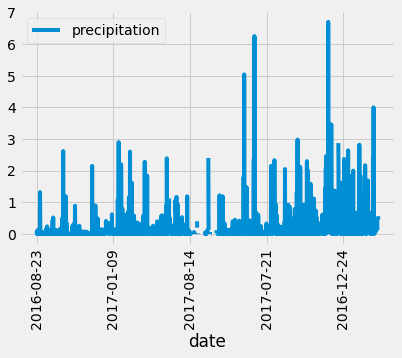

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation= 90)

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# How many stations are available in this dataset?
session.query()
session.query(func.count(Station.station)).all()

[(9,)]

In [26]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query()
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

# To fitlter the data for the most active station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [33]:
df = pd.DataFrame(results, columns=['tobs'])
print(df.head(17))

    tobs
0   77.0
1   77.0
2   80.0
3   80.0
4   75.0
5   73.0
6   78.0
7   77.0
8   78.0
9   80.0
10  80.0
11  78.0
12  78.0
13  78.0
14  73.0
15  74.0
16  80.0


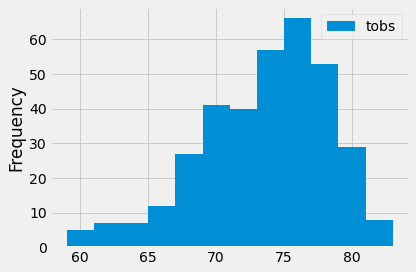

In [38]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()

# Challenge